Index of the first local minimum: 31
Corresponding time of first minimum index: 3.131313131313131
Survival probability at first local minimum: 2.6416911937998666e-05
t_p_Rog=  2.9769195487953652


/home/zohalaraib/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


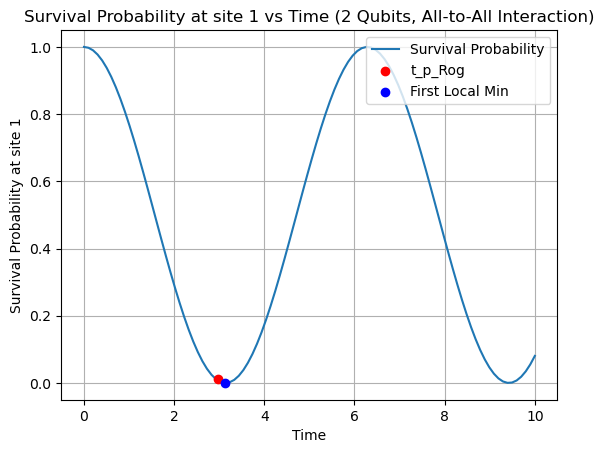

In [4]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from qiskit import Aer, transpile, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Pauli, Statevector, Operator
from qiskit.visualization import circuit_drawer

# Define the parameters
mu = 1.0
N_sites = 2
interaction_strength = mu / (2 * N_sites)
# Define time steps
times = np.linspace(0, 10, 100)  # Extending the time range to 10
tolerance = 5e-1
τ = times[1] - times[0]  # Time step

# Define the Hamiltonian H_SI for 2 qubits with all-to-all interactions
XX = Pauli('XX').to_matrix()
YY = Pauli('YY').to_matrix()
ZZ = Pauli('ZZ').to_matrix()
H_SI = interaction_strength * (XX + YY + ZZ)

# Create a quantum circuit for the initial state |01>
qc = QuantumCircuit(2)
qc.x(0)  # Apply X gate to the first qubit to create |10> state

# Visualize the initial quantum circuit
qc_drawn = circuit_drawer(qc, output='mpl')
qc_drawn.show()

# Get the initial statevector
initial_state = Statevector.from_label('10')


sigma_z_expectations = []

# Simulate the circuit for different time steps
simulator = AerSimulator()

for time in times:
    # Time evolution
    U = Operator(expm(-1j * H_SI * time))
    evolved_state = initial_state.evolve(U)
    
    # Measure expectation value of sigma_z on the first qubit
    z_expectation = evolved_state.expectation_value(Pauli('Z') ^ Pauli('I')).real
    sigma_z_expectations.append(z_expectation)

# Calculate survival probability
survival_probabilities = (1 - np.array(sigma_z_expectations)) / 2

# Function to find the index of the first local minimum
def find_first_local_minima_index(arr):
    n = len(arr)
    for i in range(1, n - 1):
        if arr[i] < arr[i - 1] and arr[i] < arr[i + 1]:
            return i
    return -1

# Index of the first minimum of the survival probabilities
i_first_local_min = find_first_local_minima_index(survival_probabilities)

# Calculate the corresponding time and survival probability at the first local minimum
if i_first_local_min != -1:
    t_min = times[i_first_local_min]
    min_survival_prob = survival_probabilities[i_first_local_min]
    print(f"Index of the first local minimum: {i_first_local_min}")
    print(f"Corresponding time of first minimum index: {t_min}")
    print(f"Survival probability at first local minimum: {min_survival_prob}")
else:
    print("No local minimum found in the array.")

# Calculate Rogerro's fit for the first minimum of the survival probability
a_t = 0
b_t = 2.105
c_t = 0

t_p_Rog = a_t * np.log(N_sites) + b_t * np.sqrt(N_sites) + c_t
print("t_p_Rog= ", t_p_Rog)

# Assert condition
assert abs(t_min - t_p_Rog) < τ + tolerance, "The time of the first minimum survival probability is not within the expected range."

# Plot the survival probability at site 1 against time
plt.plot(times, survival_probabilities, label='Survival Probability')
plt.xlabel('Time')
plt.ylabel('Survival Probability at site 1')
plt.title('Survival Probability at site 1 vs Time (2 Qubits, All-to-All Interaction)')

# Add scatter point for Rogerro's fit
plt.scatter([t_p_Rog], [survival_probabilities[np.abs(times - t_p_Rog).argmin()]], color='red', label="t_p_Rog", zorder=5)

# Add scatter point for the first local minimum
if i_first_local_min != -1:
    plt.scatter([t_min], [min_survival_prob], color='blue', label="First Local Min", zorder=5)

plt.legend(loc="upper right")
plt.grid(True)
plt.show()